Миллионы людей ежедневно пользуются поиском по картинкам в Яндексе. 
Команда Яндекса прикладывает много усилий чтобы сделать сервис более полезным и удобным. 
Но для этого нужно хорошо понимать, какие задачи решают пользователи. К примеру, есть гипотеза, что интересы людей, ищущих картинки на мобильных устройствах и на десктопных компьютерах, заметно отличаются.
Вам нужно проверить эту гипотезу, сравнив запросы на разных платформах.

В файле data.json лежит выборка запросов к Яндекс Картинкам за несколько недель.
Каждый запрос описан словарем со следующими параметрами:
```
    query - текст запроса
    ts - timestamp запроса
    platform - платформа (touch - мобильный устройства, desktop - компьютеры)


1. Выведите топ-10 самых частотных запросов в каждой платформе (desktop, touch). Какие отличия Вы видите?
2. Посмотрите, чем отличается трафик запросов в течение дня. Как можно объяснить отличие?
3. Выделите тематики запросов, контрастные для мобильных и компьютеров. Являются ли различия статистически значимыми?

In [2]:
# Ваш код

In [401]:
import pandas as pd
import seaborn
import datetime
import matplotlib.pyplot as plt

# 1

In [5]:
df = pd.read_json('data.json')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203824 entries, 0 to 1203823
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   query     1203824 non-null  object
 1   ts        1203824 non-null  int64 
 2   platform  1203824 non-null  object
dtypes: int64(1), object(2)
memory usage: 27.6+ MB


In [7]:
df = df[['platform','query','ts']]
df['ts'] = pd.to_datetime(df['ts'], unit='s')
df = df.astype({'platform':'str', 'query':'str'})

In [8]:
df.isna().sum()

platform    0
query       0
ts          0
dtype: int64

In [9]:
df.duplicated().sum()

512

In [10]:
df.head()

,platform,query,ts
0,touch,порно фото,2021-09-16 10:04:57
1,desktop,малевич картины,2021-09-16 15:34:25
2,touch,Секс,2021-09-16 08:39:43
3,touch,с днём рождения лена,2021-09-16 05:52:43
4,touch,зверополис порно,2021-09-16 10:19:59


In [11]:
df[['platform', 'query']].value_counts().head(20)

platform  query                  
touch     порно                      7740
          секс                       6348
          с днём рождения женщине    4903
          с днём рождения            3967
          с днём рождения мужчине    3623
          хентай                     3157
          с днем рождения            3005
desktop   календарь 2021             2804
          таблица менделеева         2631
touch     xxx                        2429
          Порно                      2330
          календарь 2021             2237
          доброе утро                2136
          таблица менделеева         2097
          xnxx                       1981
          Секс                       1901
          карта метро москвы         1834
          айфон 13                   1739
          porno                      1708
          английский алфавит         1689
Name: count, dtype: int64

In [12]:
touch = df.query('platform == "touch"') 
desktop = df.query('platform == "desktop"') 

In [307]:
touch['query'].value_counts().head(10)

query
порно                      7740
секс                       6348
с днём рождения женщине    4903
с днём рождения            3967
с днём рождения мужчине    3623
хентай                     3157
с днем рождения            3005
xxx                        2429
Порно                      2330
календарь 2021             2237
Name: count, dtype: int64

In [14]:
desktop['query'].value_counts().head(10)

query
календарь 2021                     2804
таблица менделеева                 2631
картинки                           1647
порно                              1342
английский алфавит                 1293
обои на рабочий стол               1143
Одноклассники (социальная сеть)    1116
секс                                895
таблица квадратов                   877
алфавит                             874
Name: count, dtype: int64

In [343]:
# top_platform = df.groupby(['platform', 'query']).size().reset_index(name = 'count')

In [18]:
top_10 = top_platform.sort_values(by = ['platform','count'], ascending = [True, False])

In [19]:
top_10_query = top_10.groupby('platform').head(10)

In [20]:
top_10_query[top_10_query['platform'] == "desktop"]['count'].sum()

14622

In [21]:
top_10_query[top_10_query['platform'] == "touch"]['count'].sum()

39739

# 2

In [23]:
df['ts'].min()

Timestamp('2021-08-31 21:00:00')

In [37]:
df['hours'] = df['ts'].dt.hour

In [390]:
df['week'] = df['ts'].dt.isocalendar().week

In [453]:
df['ts'].dt.weekday

0          3
1          3
2          3
3          3
4          3
          ..
1203819    6
1203820    6
1203821    6
1203822    6
1203823    6
Name: ts, Length: 1203824, dtype: int32

In [ ]:
    # profiles['dt'] = profiles['first_ts'].dt.date
    # profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # profiles['week'] = profiles['first_ts'].astype('datetime64[W]')

<Axes: >

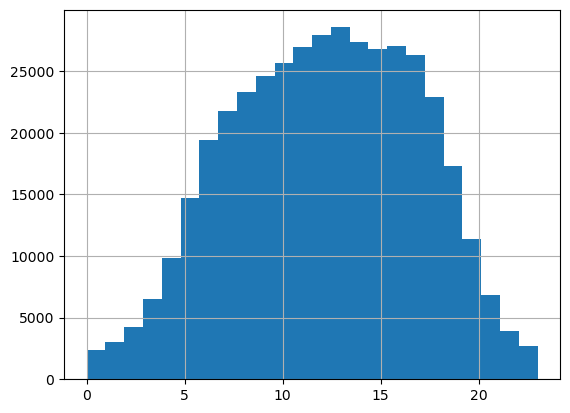

In [39]:
df[df['platform'] == "desktop"]['hours'].hist(bins = 24)

<Axes: >

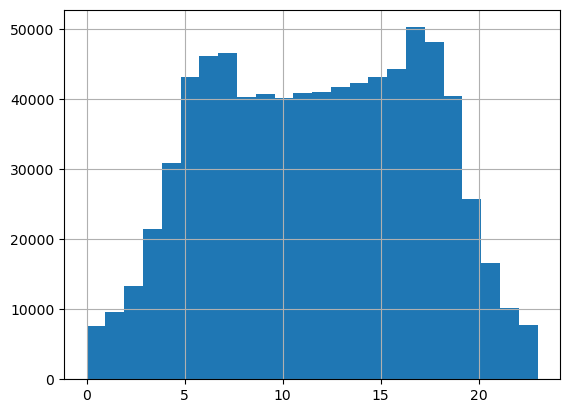

In [40]:
df[df['platform'] == "touch"]['hours'].hist(bins = 24)

<Axes: >

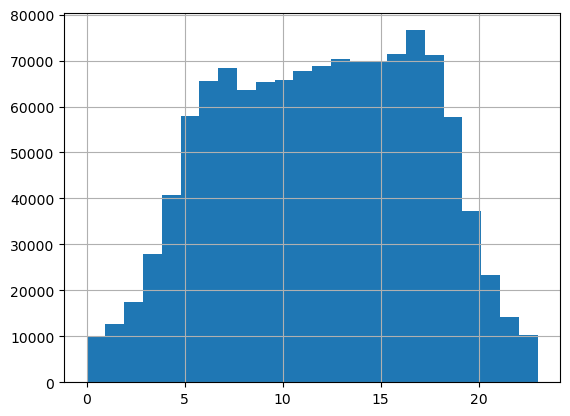

In [41]:
df['hours'].hist(bins = 24)

In [42]:
df

,platform,query,ts,hours
0,touch,порно фото,2021-09-16 10:04:57,10
1,desktop,малевич картины,2021-09-16 15:34:25,15
2,touch,Секс,2021-09-16 08:39:43,8
3,touch,с днём рождения лена,2021-09-16 05:52:43,5
4,touch,зверополис порно,2021-09-16 10:19:59,10
...,...,...,...,...
1203819,touch,бабочка,2021-09-12 19:40:53,19
1203820,touch,все республики россии,2021-09-12 16:08:54,16
1203821,touch,кухня в стиле лофт,2021-09-12 07:37:32,7
1203822,desktop,топор,2021-09-12 12:22:27,12


# 3 

In [48]:
df.head()

,platform,query,ts,hours
0,touch,порно фото,2021-09-16 10:04:57,10
1,desktop,малевич картины,2021-09-16 15:34:25,15
2,touch,Секс,2021-09-16 08:39:43,8
3,touch,с днём рождения лена,2021-09-16 05:52:43,5
4,touch,зверополис порно,2021-09-16 10:19:59,10


In [50]:
df['query'].nunique()

25737

In [52]:
df['query'].value_counts()

query
порно                        9082
секс                         7243
с днём рождения женщине      5404
календарь 2021               5041
таблица менделеева           4728
                             ... 
ac/dc группа                    1
погода екатеринбург на 10       1
кино онлайн                     1
руское порно                    1
погода в курске на неделю       1
Name: count, Length: 25737, dtype: int64

In [54]:
df['query'].str.lower().value_counts()

query
порно                          11484
секс                            9209
с днём рождения женщине         5427
календарь 2021                  5078
хентай                          5015
                               ...  
погода в махачкале                 1
погода в курске на 10 дней         1
погода в нижнекамске               1
погода в саранске на неделю        1
погода в курске на неделю          1
Name: count, Length: 24026, dtype: int64

In [55]:
df['query'] =(df['query']
 .str.strip()
 .str.lower()
 .replace(to_replace = ' ', value = '_', regex = True)
 .replace(to_replace = r'\W', value = '', regex = True)
 # .value_counts()
 # .head(10)
 )

In [91]:
(df['query']
 .str.strip()
 .str.lower()
 .replace(to_replace = ' ', value = '_', regex = True)
 .replace(to_replace = r'\W', value = '', regex = True)
 .value_counts()
 .head(50)
)

query
порно                                   11507
секс                                     9233
с_днём_рождения_женщине                  5427
календарь_2021                           5078
хентай                                   5015
таблица_менделеева                       4937
с_днём_рождения                          4420
с_днём_рождения_мужчине                  4001
с_днем_рождения                          3769
картинки                                 3521
xxx                                      3510
английский_алфавит                       3101
xnxx                                     2829
porno                                    2581
доброе_утро                              2487
hentai                                   2319
айфон_13                                 2239
sex                                      2234
алфавит                                  2148
карта_метро_москвы                       2084
девушка_в_платье                         2000
карта_метро                 

In [310]:
#Функция для определения статуса семейного положения
# def categorize(row):
#     porn = ['секс','порно','18','+18','18+', 'порно_фото', 'хентай'] 
#     if row in porn:
#         return '+18'
#     elif 'женат / замужем' == row:
#         return 'В браке'
#     elif 'в разводе' == row or 'вдовец / вдова' == row: 
#         return 'Был в браке'
#     return 'Прочее'

In [59]:
df['categori'] = df['query'].apply(categorize)

In [60]:
df[df['categori'] == "+18"]['query'].unique()

array(['порно_фото', 'секс', 'хентай', 'порно', '18'], dtype=object)

In [61]:
df

,platform,query,ts,hours,categori
0,touch,порно_фото,2021-09-16 10:04:57,10,+18
1,desktop,малевич_картины,2021-09-16 15:34:25,15,Прочее
2,touch,секс,2021-09-16 08:39:43,8,+18
3,touch,с_днём_рождения_лена,2021-09-16 05:52:43,5,Прочее
4,touch,зверополис_порно,2021-09-16 10:19:59,10,Прочее
...,...,...,...,...,...
1203819,touch,бабочка,2021-09-12 19:40:53,19,Прочее
1203820,touch,все_республики_россии,2021-09-12 16:08:54,16,Прочее
1203821,touch,кухня_в_стиле_лофт,2021-09-12 07:37:32,7,Прочее
1203822,desktop,топор,2021-09-12 12:22:27,12,Прочее


In [62]:
df['query'].nunique()

24006

In [63]:
df['query'] = df['query'].replace('_', ' ', regex = True)

In [439]:
from collections import Counter

# Объедините все строки в столбце в один текст и разделите их на слова
words = df['query'].str.cat(sep=' ').split()

# Подсчитайте количество каждого слова
word_counts = Counter(words)

word_counts_df = pd.DataFrame(word_counts.items(), columns = ['Word','Count'])

In [447]:
word_counts_df.sort_values('Count', ascending = False).head(50)

,Word,Count
5,с,108809
7,рождения,61775
6,днём,53095
23,картинки,36625
277,на,34932
0,порно,27313
46,в,26058
82,2021,25959
271,для,25597
1,фото,21822


In [435]:
# unique_words

In [334]:
df.loc[df['query'].str.contains('погода', case=False, na=False), 'категория'] = 'погода'
df.loc[df['query'].str.contains('рождения|поздравление', case=False, na=False), 'категория'] = 'поздравление'
df.loc[df['query'].str.contains('animals|животные|звери|собака', case=False, na=False), 'категория'] = 'животные'
df.loc[df['query'].str.contains('обои|картинки|фото|фон|аватарки|рисунки|раскраски', case=False, na=False), 'категория'] = 'картинки'
df.loc[df['query'].str.contains('таблица|алфавит|падежи|формулы|цифры', case=False, na=False), 'категория'] = 'учёба'
df.loc[df['query'].str.contains('ютуб|вк|youtube|vk', case=False, na=False), 'категория'] = 'social network'
df.loc[df['query'].str.contains('календарь', case=False, na=False), 'категория'] = 'календарь'
df.loc[df['query'].str.contains('аниме|наруто|anime', case=False, na=False), 'категория'] = 'anime'

df.loc[df['query'].str.contains('порно|секс|18|хентай|sex|porn|porno|xxx|сиськи|hentai|эротика|голые|ххх|хуй|пизда|минет', case=False, na=False), 'категория'] = '18+'
df['категория'] = df['категория'].fillna('Прочее')

In [340]:
df['категория'].value_counts()

категория
Прочее            878373
18+                95555
картинки           93342
поздравление       59731
учёба              35516
календарь          16202
social network     12417
anime               8983
животные            2765
погода               940
Name: count, dtype: int64

In [336]:
df

,platform,query,ts,hours,categori,категория
0,touch,порно фото,2021-09-16 10:04:57,10,+18,18+
1,desktop,малевич картины,2021-09-16 15:34:25,15,Прочее,Прочее
2,touch,секс,2021-09-16 08:39:43,8,+18,18+
3,touch,с днём рождения лена,2021-09-16 05:52:43,5,Прочее,поздравление
4,touch,зверополис порно,2021-09-16 10:19:59,10,Прочее,18+
...,...,...,...,...,...,...
1203819,touch,бабочка,2021-09-12 19:40:53,19,Прочее,Прочее
1203820,touch,все республики россии,2021-09-12 16:08:54,16,Прочее,Прочее
1203821,touch,кухня в стиле лофт,2021-09-12 07:37:32,7,Прочее,Прочее
1203822,desktop,топор,2021-09-12 12:22:27,12,Прочее,Прочее


In [166]:
(df.query('категория != категория')['query']
 .str.strip()
 .str.lower()
 # .replace(to_replace = ' ', value = '_', regex = True)
 # .replace(to_replace = r'\W', value = '', regex = True)
 .value_counts()
 .head(50)
)

query
xnxx                              2829
доброе утро                       2487
карта метро москвы                2084
девушка в платье                  2000
карта метро                       1998
переводчик                        1963
с 1 сентября                      1962
карта мира                        1838
схема метро москвы                1777
bokep                             1526
яндекс                            1428
с днем знаний                     1424
азиатские девушки                 1406
1 сентября                        1274
карта россии                      1238
одноклассники социальная сеть     1178
iphone 13                         1159
спортивные девушки                1107
загадки                           1088
знаки зодиака                     1083
инстасамка                        1068
осень                             1039
с добрым утром                    1029
девушка                            993
рождество пресвятой богородицы     983
метро спб          

In [169]:
df.columns

Index(['platform', 'query', 'ts', 'hours', 'categori', 'категория'], dtype='object')

In [260]:
# (df.query('категория != категория')['query']
#  .str.strip()
#  .str.lower()
#  # .replace(to_replace = ' ', value = '_', regex = True)
#  # .replace(to_replace = r'\W', value = '', regex = True)
#  .pivot_table(index=['platform','query', 'категория'], values='категория', aggfunc = 'count')
#  .head(50)
# )

In [255]:
# df.groupby(['platform', 'query', 'категория']).size().reset_index(by = 'count')

In [253]:
# df_77 = df.groupby(['категория']).size().reset_index(name = 'count')

In [251]:
# df_77[df_77['категория'] == "18+"]

In [289]:
pivot_categori = df.groupby(by = ['platform', 'категория']).agg('count').reset_index()
pivot_categori = pivot_categori[['platform', 'категория', 'query']].sort_values(by = 'query', ascending = False)
pivot_categori_desktop = pivot_categori.query('platform == "desktop"').sort_values(by = 'query', ascending = False)
pivot_categori_touch = pivot_categori.query('platform == "touch"').sort_values(by = 'query', ascending = False)

<Axes: xlabel='query', ylabel='категория'>

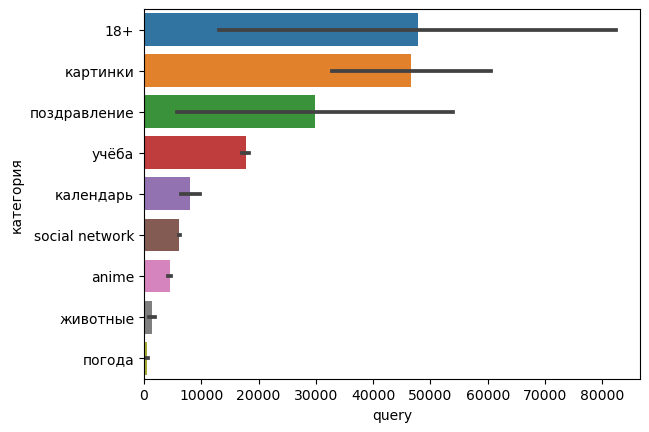

In [291]:
seaborn.barplot(y= pivot_categori['категория'], x= pivot_categori ['query'])

<Axes: xlabel='query', ylabel='категория'>

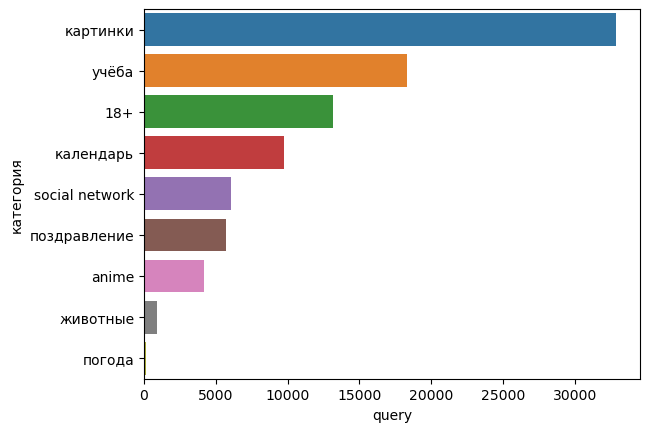

In [301]:
seaborn.barplot(y= pivot_categori_desktop['категория'], x= pivot_categori_desktop['query'])

<Axes: xlabel='query', ylabel='категория'>

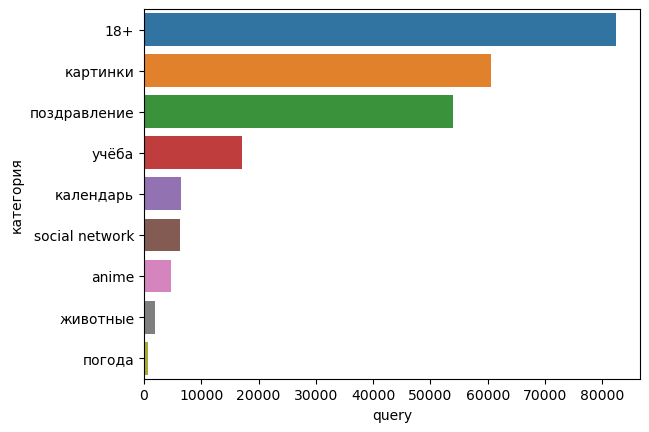

In [295]:
seaborn.barplot(y= pivot_categori_touch['категория'], x= pivot_categori_touch['query'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '18+'),
  Text(1, 0, 'картинки'),
  Text(2, 0, 'поздравление'),
  Text(3, 0, 'учёба'),
  Text(4, 0, 'календарь'),
  Text(5, 0, 'social network'),
  Text(6, 0, 'anime'),
  Text(7, 0, 'животные'),
  Text(8, 0, 'погода')])

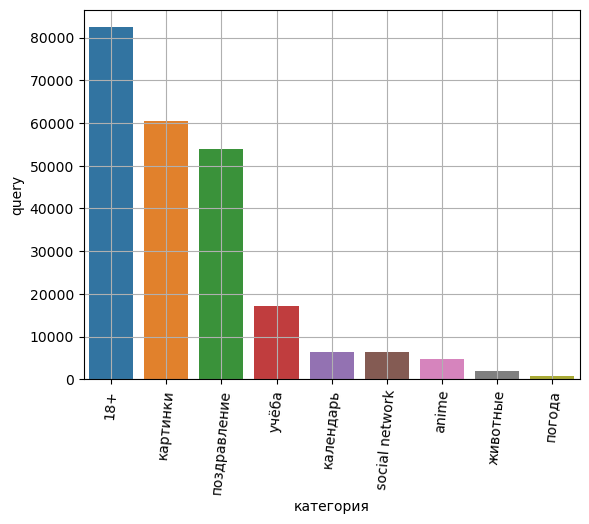

In [416]:
seaborn.barplot(x= pivot_categori_touch['категория'], y= pivot_categori_touch['query'])
plt.grid()
plt.xticks(rotation = 85)